In [48]:
import numpy as np
import matplotlib.pyplot as plt
import json

# Load the data
legislator_embeddings = np.load('output/legislator_embeddings.npy')

# Load member details and map
with open("output/member_id_map.json", "r") as f:
    member_id_map = json.load(f)

with open("output/member_details.json", "r") as f:
    member_details = json.load(f)

Text(0.5, 1.0, 'MP Embeddings based on divisions 2019-2023')

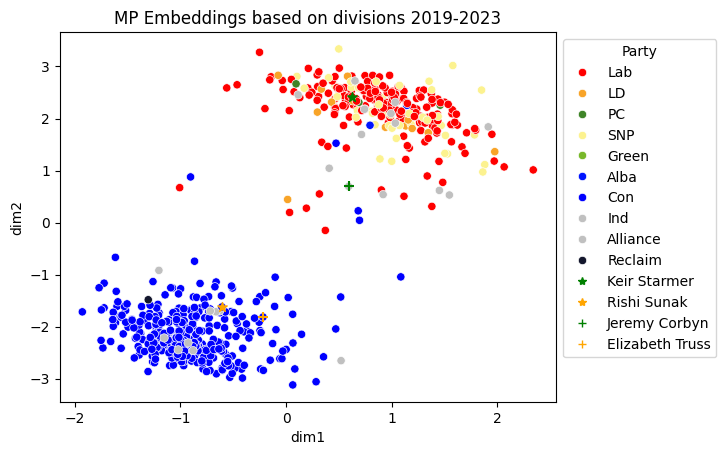

In [49]:
import seaborn as sns
import pandas as pd

# Create a dataframe from the embeddings
df = pd.DataFrame(legislator_embeddings, columns=['dim1','dim2'])
df['party'] = [member['PartyAbbrev'] for member in member_details]
df['name'] = [member['Name'] for member in member_details]
df['color'] = [member['Color'] for member in member_details]
df['color'] = "#" + df['color']

cmap = df.groupby('party')['color'].first().to_dict()

ax = sns.scatterplot(df, x='dim1', y='dim2', hue='party', palette=cmap)
# sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), ncol=1)
handles, labels = ax.get_legend_handles_labels()

# Plot Keir Starmer
starmer = df[df['name'] == 'Keir Starmer'].iloc[0]
plt.scatter(starmer['dim1'], starmer['dim2'], color='green', marker='*', s=50)

sunak = df[df['name'] == 'Rishi Sunak'].iloc[0]
plt.scatter(sunak['dim1'], sunak['dim2'], color='orange', marker='*', s=50)

corbyn = df[df['name'] == 'Jeremy Corbyn'].iloc[0]
plt.scatter(corbyn['dim1'], corbyn['dim2'], color='green', marker='+', s=50)

truss = df[df['name'] == 'Elizabeth Truss'].iloc[0]
plt.scatter(truss['dim1'], truss['dim2'], color='orange', marker='+', s=50)

# Add Starmer, Sunak, Truss, and Corbyn to the legend with their color and shape, without overwriting the existing legend
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='green', marker='*', lw=0),
                Line2D([0], [0], color='orange', marker='*', lw=0),
                Line2D([0], [0], color='green', marker='+', lw=0),
                Line2D([0], [0], color='orange', marker='+', lw=0)]
handles.extend(custom_lines)
labels.extend(['Keir Starmer', 'Rishi Sunak', 'Jeremy Corbyn', 'Elizabeth Truss'])

# Create the combined legend
ax.legend(handles=handles, labels=labels, bbox_to_anchor=(1, 1), ncol=1, title='Party')
plt.title('MP Embeddings based on divisions 2019-2023')